#  Curso de Introducción a la Inteligencia Artificial y los algoritmos


---


*Red neuronal con Python*

---

**Autor:** Escalante Guadarrama Jorge Eduardo

Utilizamos Google colab, un entorno de desarrollo desarrollado por Google. Creamos una libreta con extensión .ipynb.  Un archivo IPYNB es un documento de cuaderno utilizado por Jupyter Notebook, un entorno computacional interactivo diseñado para ayudar a los científicos a trabajar con el lenguaje Python y sus datos

### Descripción del Problema: Conversión de Distancias

Esta es una sencilla red neuronal. En muchos países, se utiliza el sistema métrico para medir las distancias en metros. Sin embargo, en otros países, como los Estados Unidos, se usa el sistema imperial y las distancias se miden en millas.  
La fórmula que relaciona ambas unidades es:  

$$
\text{Millas} = \text{Metros} \times 0.000621371
$$

O también,  

$$
\text{Metros} = \text{Millas} \times 1609.34
$$

Se trata de una fórmula lineal donde tenemos un valor de **X** que es la distancia en metros, un valor de **Y** que es la distancia en millas, una constante de **0.000621371** (para convertir metros a millas), y un término independiente de **0**.

Es importante entender los conceptos de **PESOS** y **SESGOS**, que son utilizados por la red neuronal para ajustar el modelo de manera que prediga con mayor precisión la conversión entre ambas unidades de medida.


**Importar liberias**

In [ ]:
import tensorflow as tf           # Library for AI developed by Google
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # Import the Matplotlib library for graphing
import random                     # Library for generating random numbers

**Fijación de semillas**

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)
random.seed(1)

**Introducción de datos de ejemplo**

In [ ]:
# Introduce example data
meters = np.array([
    0.0, 50.0, 100.0, 150.0, 200.0, 250.0,
    300.0, 350.0, 400.0, 450.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0
], dtype=float)
miles = meters * 0.000621371

# These are the examples the neural network will use to learn
print(meters)
print(miles)

[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  600.
  700.  800.  900. 1000.]
[0.         0.03106855 0.0621371  0.09320565 0.1242742  0.15534275
 0.1864113  0.21747985 0.2485484  0.27961695 0.3106855  0.3728226
 0.4349597  0.4970968  0.5592339  0.621371  ]


**Datos de entrada y salida para el modelo**

In [ ]:
# Input and output data for the model
meters = np.array([
    0.0, 50.0, 100.0, 150.0, 200.0, 250.0,
    300.0, 350.0, 400.0, 450.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0
], dtype=float)
miles = meters * 0.000621371

**Creación del modelo de red neuronal**

In [ ]:
# Create a neural network model with one neuron
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
print(layer)

# Sequential model
model = tf.keras.Sequential([layer])
print(model)

<Dense name=dense, built=False>
<Sequential name=sequential, built=True>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilación del modelo de distancias**

In [ ]:
# Compile the model. Prepare it for training using two key properties: optimizer and loss function.
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

**Entrenamiento del modelo de distancias**

In [ ]:
# Train the model using the fit function
print("Starting training...")
history = model.fit(meters, miles, epochs=1000, verbose=False)
print("Model trained!")

Starting training...
Model trained!


**Visualización de la función de pérdida**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


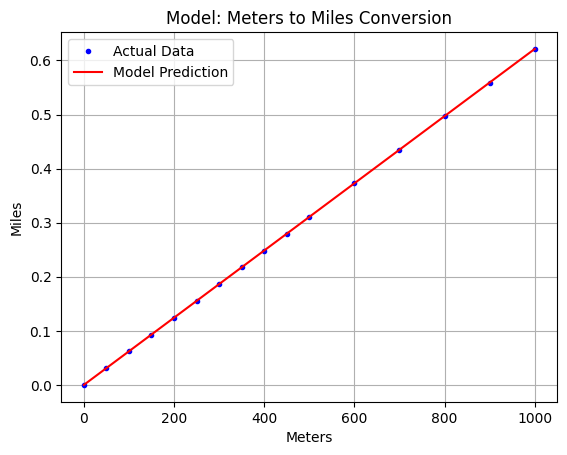

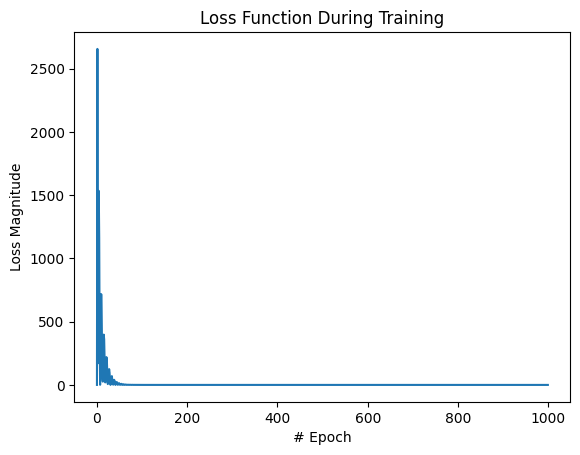

In [ ]:
# Plot the model's predictions against the actual data to observe how well the model performs.
plt.xlabel("Meters")
plt.ylabel("Miles")
plt.title("Model: Meters to Miles Conversion")
plt.plot(meters, miles, 'b.', label="Actual Data")
plt.plot(meters, model.predict(meters), 'r-', label="Model Prediction")
plt.legend()
plt.grid(True)
plt.show()

# Plot the loss function results to observe how well the model is performing over each iteration.
plt.xlabel("# Epoch")
plt.ylabel("Loss Magnitude")
plt.plot(history.history["loss"])
plt.title("Loss Function During Training")
plt.show()

**Predicción del modelo**

In [ ]:
# Make a prediction using the trained model
print("Making a prediction!")
result = model.predict(np.array([450.0]))  # Predict the distance in miles for 450 meters
print("The result is " + str(result) + " miles!")

Making a prediction!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The result is [[0.27962103]] miles!


**Mostrar variables internas del modelo**

In [ ]:
# Display the internal variables (weights and biases) of the model
print("Internal variables of the model")
print(layer.get_weights())

Internal variables of the model
[array([[0.00062135]], dtype=float32), array([1.41542705e-05], dtype=float32)]


Por tanto, hemos introduccido 450, que es multiplicado por 0.00062135 y después se le suma 1.41542705e-05, es decir 450 * 0.00062135 + 1.41542705e-05 = **0.27962103**.
# Entrada ha sido 450 metros y salida ha sido 0.27962103 millas.
La red neuronal sin haberle dicho la fórmula ha conseguido un resultado prácticamente igual al de la fórmula original.

**Agregar capas adicionales y neuronas a la red neuronal**

In [ ]:
# Add more layers and neurons to the neural network. Adding 2 hidden layers with 3 neurons each and keeping the same process
hidden_layer1 = tf.keras.layers.Dense(units=3, input_shape=[1])           # First hidden layer with 3 neurons
hidden_layer2 = tf.keras.layers.Dense(units=3)                            # Second hidden layer with 3 neurons
output_layer = tf.keras.layers.Dense(units=1)                             # Output layer with 1 neuron
model = tf.keras.Sequential([hidden_layer1, hidden_layer2, output_layer]) # Build the model with all layers


In [ ]:
# Compile the model. Prepare it for training using two key properties: optimizer and loss function.
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
# Train the model using the fit function
print("Starting training...")
history = model.fit(meters, miles, epochs=1000, verbose=False)
print("Model trained!")

Starting training...
Model trained!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


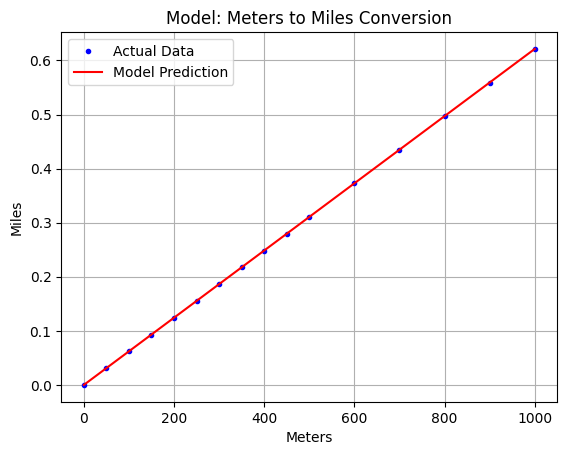

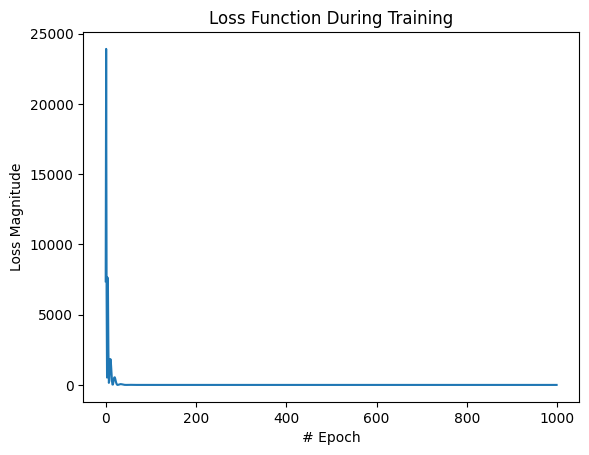

In [ ]:
# Plot the model's predictions against the actual data to observe how well the model performs.
plt.xlabel("Meters")
plt.ylabel("Miles")
plt.title("Model: Meters to Miles Conversion")
plt.plot(meters, miles, 'b.', label="Actual Data")
plt.plot(meters, model.predict(meters), 'r-', label="Model Prediction")
plt.legend()
plt.grid(True)
plt.show()

# Plot the loss function results to observe how well the model is performing over each iteration.
plt.xlabel("# Epoch")
plt.ylabel("Loss Magnitude")
plt.plot(history.history["loss"])
plt.title("Loss Function During Training")
plt.show()

In [ ]:
# Make a prediction using the trained model
print("Making a prediction!")
result = model.predict(np.array([450.0]))
print("The result is " + str(result) + " miles!")

Making a prediction!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The result is [[0.27961382]] miles!


In [ ]:
# Display the internal variables (weights and biases) of the model
print("Internal variables of the model")
#print(capa.get_weights())          # This line is commented out, since we are using named layers.
print(hidden_layer1.get_weights())  # Weights and biases for the first hidden layer
print(hidden_layer2.get_weights())  # Weights and biases for the second hidden layer
print(output_layer.get_weights())   # Weights and biases for the output layer

Internal variables of the model
[array([[ 0.01428234, -0.03604969,  0.0248621 ]], dtype=float32), array([-0.2037016 ,  0.20564173, -0.7429444 ], dtype=float32)]
[array([[-0.0723608 ,  0.02000435, -0.6639826 ],
       [-0.62070215, -0.17486122,  0.30374125],
       [ 0.14269656,  0.2975655 , -0.28506917]], dtype=float32), array([ 0.2043734 , -0.05362661,  0.08201685], dtype=float32)]
[array([[-0.09565181],
       [-0.6965036 ],
       [-0.46309415]], dtype=float32), array([0.00700507], dtype=float32)]
